# ÖNERİLER

**1-Mavi Kart sahiplerine yönelik özel promosyonlar düzenleyin.**

In [2]:
import pandas as pd

dosya_yolu = "/workspaces/Bitirme_Projesi/archive (1).zip"
df = pd.read_csv(dosya_yolu)
df.head() 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [15]:
# 1. Gelir, cinsiyet ve kart türü gibi temel bilgilere göre veri incelemesi yapalım
print(df['Income_Category'].value_counts())
print(df['Gender'].value_counts())
print(df['Card_Category'].value_counts())
print(df['Attrition_Flag'].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Gender
F    5358
M    4769
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [23]:
# 2. Çekilen kadın mavi kart sahiplerini filtreleyelim
target_customers = df[(df['Card_Category'] == 'Blue') & 
                      (df['Income_Category'] == 'Less than $40K') & 
                      (df['Gender'] == 'F') & 
                      (df['Attrition_Flag'] == 'Attrited Customer')]

# 3. Bu segmentteki müşteri sayısını kontrol edelim
print(f"Çekilen Kadın Mavi Kart Sahibi Müşteri Sayısı: {len(target_customers)}")

# 4. Filtrelenmiş verileri inceleyelim
target_customers.head()


Çekilen Kadın Mavi Kart Sahibi Müşteri Sayısı: 559


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,...,8025.0,0,8025.0,0.654,673,18,0.800,0.000,0.99672,0.003282
145,712950783,Attrited Customer,48,F,4,Uneducated,Married,Less than $40K,Blue,38,...,2732.0,0,2732.0,0.760,739,16,0.455,0.000,0.99518,0.004820
206,719808558,Attrited Customer,55,F,2,Graduate,Married,Less than $40K,Blue,43,...,1438.3,0,1438.3,0.707,886,27,0.421,0.000,0.99727,0.002727


In [24]:
# 5. Promosyonlar için markaları listeleyelim
promotions = ['Zara', 'H&M', 'Sephora', 'M.A.C Cosmetics', 'Chanel', 'Nike', 'Adidas', 'Revlon']

# 6. Müşterilere rastgele promosyonlar atayalım
target_customers['Promotions'] = [random.choice(promotions) for _ in range(len(target_customers))]

# 7. Sonuçları görüntüleyelim
target_customers[['Customer_Age', 'Gender', 'Income_Category', 'Card_Category', 'Promotions']]

/tmp/ipykernel_25850/3172549706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_customers['Promotions'] = [random.choice(promotions) for _ in range(len(target_customers))]


,Customer_Age,Gender,Income_Category,Card_Category,Promotions
21,62,F,Less than $40K,Blue,Revlon
51,54,F,Less than $40K,Blue,Adidas
140,48,F,Less than $40K,Blue,Nike
145,48,F,Less than $40K,Blue,Revlon
206,55,F,Less than $40K,Blue,Revlon
...,...,...,...,...,...
10023,49,F,Less than $40K,Blue,Zara
10054,33,F,Less than $40K,Blue,Revlon
10089,52,F,Less than $40K,Blue,Sephora
10105,59,F,Less than $40K,Blue,M.A.C Cosmetics


**2. Altın Kart sahipleri için gelir seviyelerine uygun teklifler geliştirin.**

--Altın kart sahipleri için gelir seviyelerine uygun teklifler geliştirmek için, her gelir kategorisindeki altın kart sahiplerini belirleyebilir ve her segment için özel teklifler tasarlayabiliriz.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Altın kart sahiplerini filtrele
gold_customers = df[df['Card_Category'] == 'Gold']

# 2. Gelir kategorisini kontrol et ve 'Unknown' değerlerini çıkar
gold_customers = gold_customers[~gold_customers['Income_Category'].isin(['Unknown', 'No Info'])] #isin() birden fazla değer kontrolü için kullandık.

# 3. Gelir kategorisine göre altın kart sahiplerini gruplandıralım
income_groups = gold_customers.groupby('Income_Category').size().reset_index(name='Count')
# her grup için satır sayısını döndürür. Yani, gruplandırılmış her gelir kategorisi için kaç müşteri olduğunu sayar.
#reset_index() fonksiyonu ile, groupby() ve size() sonucu elde edilen veriyi düzgün bir DataFrame formatında döndürür.

# 4. Gelir segmentlerine uygun teklifler geliştirelim
offers = {
    'Less than $40K': 'Özel indirimli kozmetik, moda markaları ve temel ihtiyaç ürünlerinde promosyonlar.',
    '$40K - $60K': 'Daha fazla harcama yapan müşterilere yönelik seyahat ve eğlence promosyonları.',
    '$60K - $80K': 'Yüksek gelir grubundaki müşterilere yönelik premium hizmetler, spor salonu üyelikleri.',
    '$80K - $120K': 'Lüks alışveriş, araba kiralama ve tatil paketleri promosyonları.',
    '$120K +': 'Özel ve kişisel alışveriş danışmanlık hizmetleri, özel etkinlik davetiyeleri.'
}

In [40]:
# 5. Gelir kategorilerine göre müşteri sayısını ve teklifleri yazdır
for income_category, count in income_groups.values:
    print(f"{income_category} geliri olan Altın Kart Sahibi Müşteri Sayısı: {count}")
    print(f"Önerilen Teklif: {offers.get(income_category, 'Bu gelir kategorisi için teklif bulunmamaktadır.')}")
    print("-" * 50) #"-" * 50 ifadesi, 50 tire (-) karakteri oluşturur ve yazdırdığınızda uzun bir çizgi şeklinde görünecektir.


$120K + geliri olan Altın Kart Sahibi Müşteri Sayısı: 18
Önerilen Teklif: Özel ve kişisel alışveriş danışmanlık hizmetleri, özel etkinlik davetiyeleri.
--------------------------------------------------
$40K - $60K geliri olan Altın Kart Sahibi Müşteri Sayısı: 15
Önerilen Teklif: Daha fazla harcama yapan müşterilere yönelik seyahat ve eğlence promosyonları.
--------------------------------------------------
$60K - $80K geliri olan Altın Kart Sahibi Müşteri Sayısı: 29
Önerilen Teklif: Yüksek gelir grubundaki müşterilere yönelik premium hizmetler, spor salonu üyelikleri.
--------------------------------------------------
$80K - $120K geliri olan Altın Kart Sahibi Müşteri Sayısı: 21
Önerilen Teklif: Lüks alışveriş, araba kiralama ve tatil paketleri promosyonları.
--------------------------------------------------
Less than $40K geliri olan Altın Kart Sahibi Müşteri Sayısı: 24
Önerilen Teklif: Özel indirimli kozmetik, moda markaları ve temel ihtiyaç ürünlerinde promosyonlar.
--------------

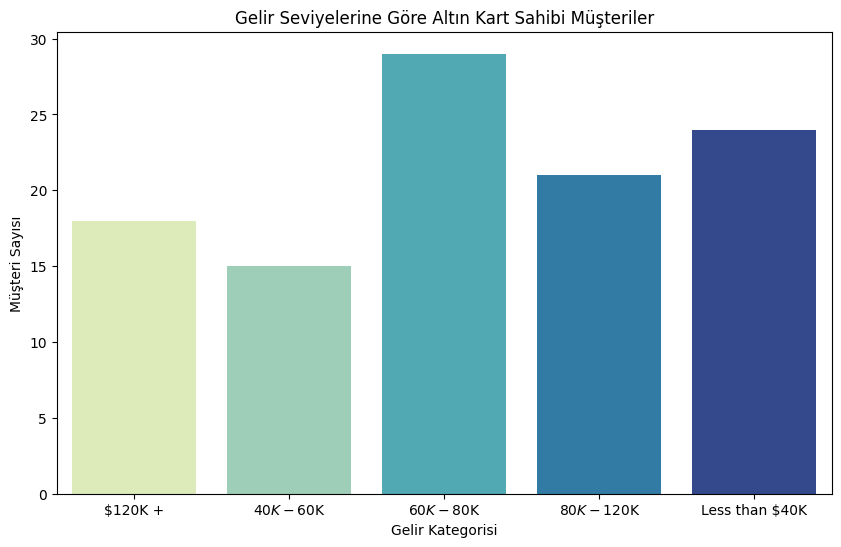

In [39]:
# Gelir seviyelerine göre altın kart sahiplerini görselleştirelim
plt.figure(figsize=(10,6))

# Seaborn barplot ile hue parametresi kullanarak farklı gelir kategorilerini renklerle ayırıyoruz
sns.barplot(data=income_groups, x='Income_Category', y='Count', hue='Income_Category', palette='YlGnBu')

plt.title('Gelir Seviyelerine Göre Altın Kart Sahibi Müşteriler')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Müşteri Sayısı')
plt.show()

**3. Kayıp riski yüksek müşterilere düzenli olarak özel indirimler sunarak
müşteri memnuniyetini artırın.**

--Buna yönelik bir strateji geliştirebiliriz. Müşteri kayıp riski yüksek olanları belirleyip, bu müşterilere yönelik düzenli özel indirimler sunarak memnuniyetlerini artırabiliriz. İlk olarak, kayıp riski yüksek müşterilerin özelliklerini belirlememiz gerekir.

In [41]:
# Kayıp müşterileri filtreleyelim
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Kayıp müşteri sayısını kontrol edelim
print(f"Kayıp Müşteri Sayısı: {len(churned_customers)}")

Kayıp Müşteri Sayısı: 1627


In [42]:
# Kayıp riski yüksek olanları filtreleyelim
high_risk_customers = churned_customers[
    (churned_customers['Income_Category'] == 'Less than $40K') &
    (churned_customers['Months_Inactive_12_mon'] > 6) &
    (churned_customers['Credit_Limit'] < 10000)
]

# Yüksek riskli müşteri sayısını yazdıralım
print(f"Kayıp Riski Yüksek Müşteri Sayısı: {len(high_risk_customers)}")

Kayıp Riski Yüksek Müşteri Sayısı: 0


In [45]:
# Kayıp müşterileri filtreleyelim
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Son 2-3 ayda bankayla hiç temas kurmayan müşterileri filtreleyelim
inactive_customers = churned_customers[churned_customers['Months_Inactive_12_mon'] >= 2]

# Bu segmentteki müşteri sayısını yazdıralım
print(f"Son 2-3 Ayda Temas Kesmeyen Kayıp Müşteri Sayısı: {len(inactive_customers)}")

# Bu segmentteki müşterilerin bilgilerini inceleyelim
inactive_customers.head()

Son 2-3 Ayda Temas Kesmeyen Kayıp Müşteri Sayısı: 1512


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


Bu müşterilere uygun teklifler sunalım.
Örneğin, son 3 ayda teması kesmiş olan müşterilere %20'lik bir indirim sunabiliriz.

In [47]:
# Income_Category kolonundaki benzersiz değerleri kontrol edelim
print(inactive_customers['Income_Category'].unique())

['Less than $40K' 'Unknown' '$120K +' '$60K - $80K' '$40K - $60K'
 '$80K - $120K']


In [48]:
# 'Unknown' değerini 'Other' ile değiştirelim
inactive_customers['Income_Category'] = inactive_customers['Income_Category'].replace('Unknown', 'Other')

# Yine de gelir kategorisine sahip olmayanlar varsa, onları da filtreleyelim
inactive_customers = inactive_customers[inactive_customers['Income_Category'] != 'Unknown']

/tmp/ipykernel_25850/2095189595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_customers['Income_Category'] = inactive_customers['Income_Category'].replace('Unknown', 'Other')


In [53]:
# İndirimli teklifleri oluşturma
offers = {
    'Less than $40K': 'Özel %20 indirimli alışveriş ve kredi kartı harcaması promosyonu.',
    '$40K - $60K': 'Seyahat promosyonları ve özel %15 indirim kampanyası.',
    '$60K - $80K': 'Yüksek harcamalar için premium hizmet promosyonları ve %10 indirim.',
    '$80K - $120K': 'Lüks tatil paketleri ve %25 indirimli alışveriş kampanyası.',
    '$120K +': 'Özel kişisel alışveriş danışmanlık hizmetleri ve davetiyeler.',
    'Other': 'Özel %10 indirimli promosyonlar ve kredi kartı harcama avantajları.'
}

# Teklifleri almak ve yazdırmak için fonksiyon yazalım
def get_offer(row):   #row: Her bir satırdaki verileri tutar.
    income_category = row['Income_Category']
    offer = offers.get(income_category, 'Özel teklifler mevcut')
    return f"Müşteri ID: {row['CLIENTNUM']} - {offer}"

# DataFrame üzerinde apply kullanarak, her satır için teklifi alıp yazdıralım
inactive_customers['Offer'] = inactive_customers.apply(get_offer, axis=1)

# Teklifleri yazdırma
for offer in inactive_customers['Offer']:
    print(offer)

Müşteri ID: 708508758 - Özel %20 indirimli alışveriş ve kredi kartı harcaması promosyonu.
Müşteri ID: 708300483 - Özel %10 indirimli promosyonlar ve kredi kartı harcama avantajları.
Müşteri ID: 779471883 - Özel %20 indirimli alışveriş ve kredi kartı harcaması promosyonu.
Müşteri ID: 714374133 - Özel kişisel alışveriş danışmanlık hizmetleri ve davetiyeler.
Müşteri ID: 712030833 - Yüksek harcamalar için premium hizmet promosyonları ve %10 indirim.
Müşteri ID: 711013983 - Seyahat promosyonları ve özel %15 indirim kampanyası.
Müşteri ID: 711887583 - Lüks tatil paketleri ve %25 indirimli alışveriş kampanyası.
Müşteri ID: 720201033 - Lüks tatil paketleri ve %25 indirimli alışveriş kampanyası.
Müşteri ID: 789322833 - Özel %20 indirimli alışveriş ve kredi kartı harcaması promosyonu.
Müşteri ID: 767712558 - Yüksek harcamalar için premium hizmet promosyonları ve %10 indirim.
Müşteri ID: 712950783 - Özel %20 indirimli alışveriş ve kredi kartı harcaması promosyonu.
Müşteri ID: 713741358 - Lüks tat

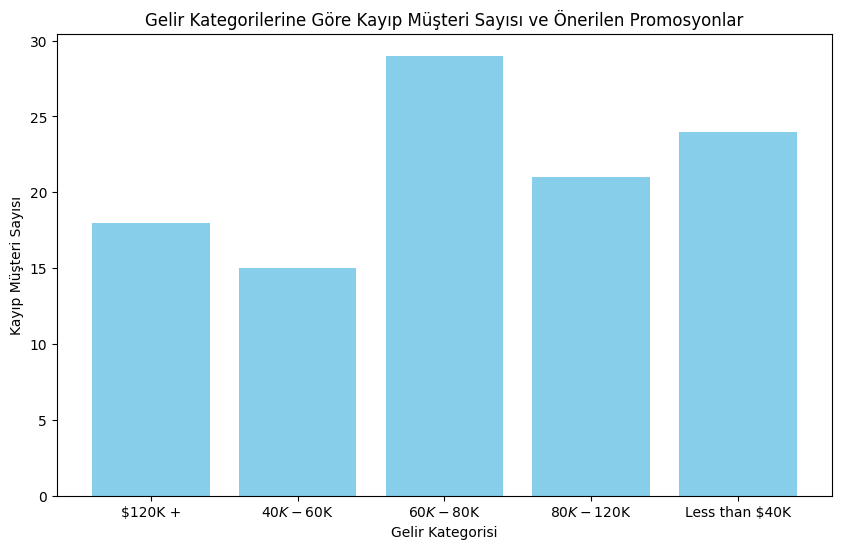

In [51]:
#  Basit bir çubuk grafik ile gösterim
plt.figure(figsize=(10, 6))
plt.bar(income_groups['Income_Category'], income_groups['Count'], color='skyblue')

#  Başlık ve etiketler
plt.title('Gelir Kategorilerine Göre Kayıp Müşteri Sayısı ve Önerilen Promosyonlar')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Kayıp Müşteri Sayısı')
plt.show()